In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("wa_registration_data_processed.csv")
data

,Clean Alternative Fuel Vehicle Type,New or Used Vehicle,DOL Transaction Date,Transaction Type,County,City,Postal Code,State of Residence,2020 Census Tract,month,year,week
0,Battery Electric Vehicle (BEV),New,7/28/2010,Original Registration,King,SEATTLE,98112.0,WA,5.303301e+10,7,2010,30
1,Battery Electric Vehicle (BEV),New,3/17/2010,Original Registration,Clark,VANCOUVER,98664.0,WA,5.301104e+10,3,2010,11
2,Battery Electric Vehicle (BEV),New,12/22/2010,Original Registration,King,REDMOND,98052.0,WA,5.303302e+10,12,2010,51
3,Battery Electric Vehicle (BEV),New,12/22/2010,Original Registration,King,MERCER ISLAND,98040.0,WA,5.303302e+10,12,2010,51
4,Battery Electric Vehicle (BEV),New,6/22/2010,Original Registration,King,KIRKLAND,98033.0,WA,5.303302e+10,6,2010,25
...,...,...,...,...,...,...,...,...,...,...,...,...
107083,Plug-in Hybrid Electric Vehicle (PHEV),New,2/22/2022,Original Registration,Clallam,SEQUIM,98382.0,WA,5.300900e+10,2,2022,8
107084,Battery Electric Vehicle (BEV),New,1/19/2022,Original Registration,Whatcom,FERNDALE,98248.0,WA,5.307394e+10,1,2022,3
107085,Battery Electric Vehicle (BEV),New,1/27/2022,Original Registration,Snohomish,MUKILTEO,98275.0,WA,5.306104e+10,1,2022,4
107086,Battery Electric Vehicle (BEV),New,8/10/2022,Original Registration,Snohomish,SNOHOMISH,98296.0,WA,5.306104e+10,8,2022,32


In [3]:
data["sale"] = 1
data_grouped = data.groupby(["year","month", "week", "Postal Code"]).count().reset_index()
data_grouped['time'] = data_grouped['year'].astype(str) + "-" + data_grouped["month"].astype(str)+ "-" + data_grouped["week"].astype(str)
# data_grouped['Postal Code'] = data_grouped['Postal Code'].astype(str)

In [4]:
data_grouped = data_grouped[["year", "month", "week", "Postal Code", "sale",'time']]
data_grouped

,year,month,week,Postal Code,sale,time
0,2010,2,7,98110.0,1,2010-2-7
1,2010,3,11,98664.0,1,2010-3-11
2,2010,3,13,98045.0,1,2010-3-13
3,2010,4,14,99026.0,1,2010-4-14
4,2010,4,17,98112.0,1,2010-4-17
...,...,...,...,...,...,...
53707,2022,8,35,99301.0,2,2022-8-35
53708,2022,8,35,99338.0,1,2022-8-35
53709,2022,8,35,99349.0,1,2022-8-35
53710,2022,8,35,99352.0,1,2022-8-35


In [5]:
unique_postal_code = data_grouped["Postal Code"].unique()
print(data_grouped["Postal Code"].unique())

[98110. 98664. 98045. 99026. 98112. 98513. 98275. 98033. 98109. 98103.
 98102. 98116. 98070. 98121. 98125. 98040. 98052. 98115. 98107. 98004.
 98006. 98930. 98034. 98144. 98248. 99352. 98075. 98133. 98177. 98039.
 98031. 98055. 98020. 98245. 98027. 98028. 98155. 98607. 98056. 98072.
 98074. 98117. 98208. 98683. 99208. 98029. 98101. 98134. 98274. 98346.
 98005. 98008. 98011. 98012. 98021. 98106. 98122. 98223. 98296. 98532.
 98001. 98105. 98203. 98250. 98512. 98682. 98003. 98059. 98108. 98199.
 98642. 98118. 98136. 98236. 98270. 98335. 98506. 99027. 99223. 98002.
 98014. 98030. 98053. 98119. 98166. 98229. 98338. 98362. 98604. 98606.
 98671. 98802. 99201. 98042. 98258. 98273. 98409. 98024. 98036. 98073.
 98092. 98221. 98271. 98367. 98368. 98403. 98597. 99004. 98007. 98022.
 98023. 98026. 98037. 98104. 98502. 98686. 99212. 98146. 98312. 98329.
 98374. 98383. 98635. 98038. 98126. 98260. 98373. 98382. 98422. 98503.
 98908. 98388. 99224. 98058. 98065. 98178. 98266. 98365. 98501. 98661.
 98685

In [6]:
def draw_cumalative_sales(data):
    print(data)
    plt.figure()
    cumalative_sales = []
    temp_sum = 0
    time = data['time'].tolist()
    for i in range(len(data)):
        temp_sum += data['sale'].iloc[i]
        cumalative_sales.append(temp_sum)
    cumalative_sales = np.array(cumalative_sales)
    x = range(len(cumalative_sales))
    x = np.array(x)
    plt.plot(time, cumalative_sales)
    locs, labels = plt.xticks()
    for label in labels:
        label.set_visible(False)
    for label in labels[0::100]:
        label.set_visible(True)
    plt.show()
    

In [15]:
def output_cumulative_csv(data):
    unique_postal_code = data["Postal Code"].unique()
    result_dataframe = pd.DataFrame(columns=['year', 'month', 'week','Postal Code',"sale","time"])
    
    for postal_code in unique_postal_code:
        temp_sum = 0
        temp_data = data[data["Postal Code"] == postal_code].reset_index()
        cumalative_sales = []
        for i in range(len(temp_data)):
            temp_sum += data['sale'].iloc[i]
            cumalative_sales.append(temp_sum)
#         print(len(cumalative_sales))
#         print(len(temp_data))
        temp_data.drop(columns=['sale'])
        temp_data['sale'] = pd.Series(data=cumalative_sales)
#         print(temp_data)
        result_dataframe = pd.concat([temp_data, result_dataframe],ignore_index=True, axis =0)
    result_dataframe = result_dataframe.drop(['time'], axis=1)
    result_dataframe.to_csv('wa_cumulative_data.csv', index=False)

In [16]:
output_cumulative_csv(data_grouped)

       year  month  week  Postal Code  sale       time
53025  2022      8    31      99330.0     1  2022-8-31
53212  2022      8    32      99330.0     1  2022-8-32


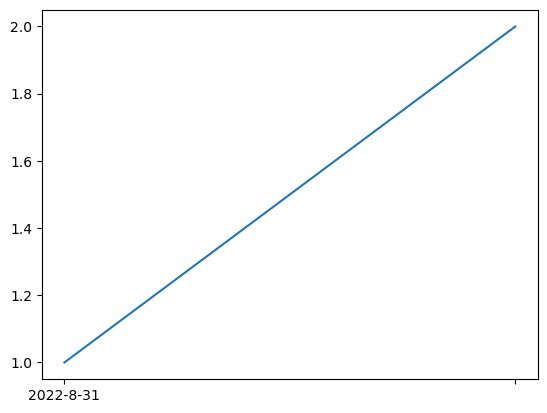

In [10]:
temp1 = data_grouped[data_grouped["Postal Code"] == 99330]
draw_cumalative_sales(temp1)
# print(temp1['sale'])